# Wine sophistication predictor

### Abstract

In this class we are going to build a predictor which is able to help against wine
sophistications. In other words, we would like to train a model based on neural
networks such that it is able to discriminate if a given bottle of wine really
comes from that precise region or not on the basis of the analysis of its chemical
data.

### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

### Getting data and setup

In [2]:
data = pd.read_csv('wine.data.csv')
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = data.drop('Wine',axis=1)
y = data['Wine']

### The preprocessing phase: splitting and scaling the data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [5]:
scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.mean_)
print(scaler.transform(X_test))

StandardScaler()
[1.30101681e+01 2.31941176e+00 2.38638655e+00 1.97798319e+01
 1.00159664e+02 2.33016807e+00 2.07302521e+00 3.65210084e-01
 1.63957983e+00 5.14176470e+00 9.63781513e-01 2.63529412e+00
 7.48084034e+02]
[[ 0.35803992 -0.57521573 -0.85076375 -0.79916448 -0.41224115  0.10970435
   0.11259045 -0.78643359 -0.46812628 -0.49735932  0.23957375  0.19483827
   1.727435  ]
 [-0.93906324 -0.56561939 -0.91982302 -0.22419124 -1.34920397 -1.06852832
  -0.04141258  0.03956462 -0.01548648 -0.7268909   0.15434423  0.77339734
  -0.76599453]
 [-0.7167027  -0.75754613 -0.33281924  0.4945253  -0.94764847  0.6438365
   1.03660863  0.20476426  0.21083343 -0.50153262 -1.16671343  0.29608611
  -1.27433242]
 [ 0.32097983  1.88144653 -0.43640815  0.06329537  1.32783267 -1.16278694
  -1.33118795  0.53516355 -0.46812628  2.11095402 -1.59286107 -1.55530291
   0.27963721]
 [-0.88964978 -0.87270217 -1.4032379  -1.08665109 -1.01457439  0.34535089
   0.41097132 -0.62123395  0.21083343 -0.93555596  1.13448

### Building and running the predictor

In [6]:
clf = MLPClassifier(hidden_layer_sizes = (13,13,13), max_iter=500)

In [7]:
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [8]:
predictions = clf.predict(X_test)
print(predictions)

[1 2 2 3 2 1 2 1 2 2 2 1 1 3 1 3 1 1 3 1 2 2 1 1 3 1 1 2 2 2 1 1 1 2 3 3 3
 1 1 2 3 2 3 1 2 2 1 3 2 3 2 2 3 3 2 3 1 2 2]


### Classification errors and the confusion matrix

In [9]:
cm = confusion_matrix(y_test, predictions)

In [10]:
accuracy = round(accuracy_score(y_test, predictions),2)

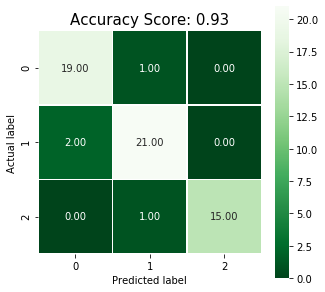

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.93        20
           2       0.91      0.91      0.91        23
           3       1.00      0.94      0.97        16

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.94        59
weighted avg       0.93      0.93      0.93        59



### Experimenting with parameters

In [13]:
## Varying test data size

accuracies = []
test_size = np.arange(0.1,1,0.1)
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, stratify=y)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = round(accuracy_score(y_test, predictions),2)
    accuracies.append(accuracy)

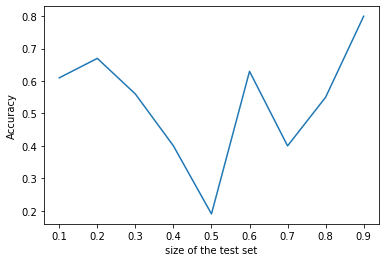

In [14]:
plt.plot(test_size,accuracies)
plt.ylabel('Accuracy');
plt.xlabel('size of the test set');

Make the same diagram as before but now in abscissa put the size of the hidden layers. Test sizes between 5 and 50 by steps of 5.

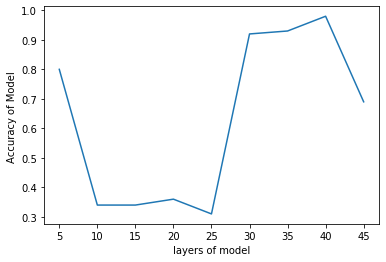

In [15]:
layers = np.arange(5,50,5)
accuracies = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
for i in layers:
    clf = MLPClassifier(hidden_layer_sizes = (i,i,i), max_iter=500)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = round(accuracy_score(y_test, predictions),2)
    accuracies.append(accuracy)
plt.plot(layers,accuracies)
plt.ylabel('Accuracy of Model ');
plt.xlabel('layers of model');

Make the same diagram as before but now in abscissa put the number of
iterations (all other parameters are as in the initial version).

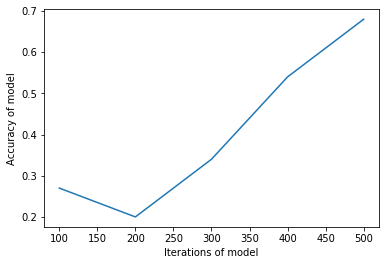

In [16]:
iterations = np.arange(100,600,100)
accuracies = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
clf = MLPClassifier(hidden_layer_sizes = (13,13,13), max_iter=i)
for i in iterations:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = round(accuracy_score(y_test, predictions),2)
    accuracies.append(accuracy)
plt.plot(iterations,accuracies)
plt.ylabel('Accuracy of model');
plt.xlabel('Iterations of model');

##### Make considerations about the experiments you just made.

The accuracy of model is best when the size of test is 0.33
The accuracy of model is best when the number of neurons are around 15 to 25
The accuracy of model is best when the iteration of models are 500